In [188]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [189]:
IMAGE_SHAPE = (224,224)  ## the size of the images the model was trained with

## the pre-trained model

classifier = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=IMAGE_SHAPE+(3,))
])

In [190]:
input_shape=IMAGE_SHAPE+(3,)
input_shape

(224, 224, 3)

In [191]:
## download a random gold fish from the internet and save in your current directory, then load the image. 
 
gold_fish_img = cv2.imread('gold_fish.png')
gold_fish_img

array([[[ 91,  78,  76],
        [ 91,  78,  76],
        [ 91,  78,  76],
        ...,
        [151,  98,  84],
        [152, 102,  88],
        [152, 105,  90]],

       [[ 91,  78,  76],
        [ 91,  78,  76],
        [ 91,  78,  76],
        ...,
        [153, 103,  90],
        [155, 107,  94],
        [157, 109,  96]],

       [[ 91,  78,  76],
        [ 91,  78,  76],
        [ 91,  78,  76],
        ...,
        [158, 109,  99],
        [160, 113, 103],
        [162, 115, 105]],

       ...,

       [[ 54,  44,  41],
        [ 54,  44,  41],
        [ 54,  44,  41],
        ...,
        [ 51,  45,  37],
        [ 51,  45,  37],
        [ 51,  45,  37]],

       [[ 57,  46,  43],
        [ 57,  46,  43],
        [ 57,  46,  43],
        ...,
        [ 55,  48,  40],
        [ 56,  49,  41],
        [ 57,  51,  43]],

       [[ 58,  47,  45],
        [ 58,  47,  45],
        [ 58,  47,  45],
        ...,
        [ 59,  53,  45],
        [ 63,  56,  48],
        [ 64,  58,  50]]

In [192]:
gold_fish_img.shape

(596, 640, 3)

In [193]:
gold_fish_img = cv2.resize(gold_fish_img,IMAGE_SHAPE)
gold_fish_img.shape

(224, 224, 3)

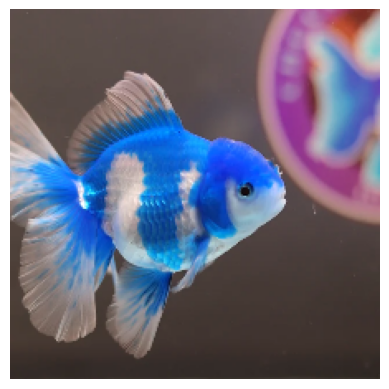

In [194]:
plt.axis('off')
plt.imshow(gold_fish_img)

In [195]:
gold_fish_img_scaled = gold_fish_img/255

In [196]:
gold_fish_img_scaled[np.newaxis, ...].shape     ## the reason why we have to introduce a new axis is because 
                                                ## the model accepts multiple images


(1, 224, 224, 3)

In [197]:
result = classifier.predict(gold_fish_img_scaled[np.newaxis, ...])

1/1 [==============================] - 1s 777ms/step


In [198]:
result.shape    ## the pre-trained model was trained with 1001 class labels

(1, 1001)

In [199]:
result    ## this is making a prediction for each class

array([[ 0.32207552,  1.6921678 ,  6.5146985 , ..., -0.4287801 ,
        -0.4071157 , -0.4228801 ]], dtype=float32)

In [200]:
predicted_label = np.argmax(result)
predicted_label

724

So far we have just done classification with the pre-trained model, without re-training it with our data

In [201]:
## download the datasets from google website
## same procedure was done in data_augmentation module

data_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' 

data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)

In [178]:
### Data Visualization

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

## Its basically your path, but a windows path object

WindowsPath('datasets/flower_photos')

In [179]:
## to get all roses images 
roses = list((data_dir.glob('roses/*.jpg')))

roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

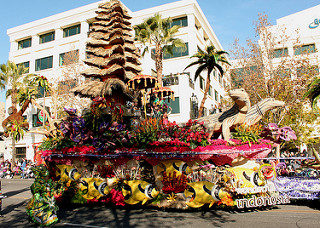

In [180]:
## to visualize the images using PIL module (pillow library)

Image.open(str(roses[7]))

In [181]:
## create classnames
## create a dictionary of different flowers and all the image path associated with it

flowers_image_dict = {
    'roses':list((data_dir.glob('roses/*.jpg'))),
    'daisy':list((data_dir.glob('daisy/*.jpg'))),
    'dandelion':list((data_dir.glob('dandelion/*.jpg'))),
    'sunflowers':list((data_dir.glob('sunflowers/*.jpg'))),
    'tulips':list((data_dir.glob('tulips/*.jpg'))),  
}

# assign a label dictionary 
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,   
}

In [182]:
### Now lets run a for loop to prepare our x and y

X, y = [], []

for flower_name, images in flowers_image_dict.items():
    #print(flower_name)   ##looping over a dictionary, this refers to each head(tag) and images refers to the items in it
    for image in images:   ##to loop over every image in each image class
        img = cv2.imread(str(image)) ##str to convert from lib path to regular string
        resized_img = cv2.resize(img,IMAGE_SHAPE)  ##we resize the images
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) 

In [185]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [ ]:
## converting to numpy array

X_trimed = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_,test_size=0.2, random_state=0)

X_train_scaled = X_train/255
X_test_scaled = X_test/255

## I ran out of memmory here

In [206]:
## the feature extractor model
## this gives the same model as the previous one except the last layer 

feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable=False)
## trainable is set to false, which fixes the weight of all other layers excluding the last layer

In [207]:
#### create the trained model

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,  
    tf.keras.layers.Dense(5)           ## output layer 
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_12 (KerasLayer)  (None, 1280)             2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [208]:
model.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy', #using 'sparse_categorical_crossentropy' because the final array (y) has its exact value (not one-hot encoded vector)
           metrics=['accuracy']) 

In [ ]:
model.fit(X_train_scaled, y_train, epochs=10)